In [1]:
from barplots import barplots
import pandas as pd

In [2]:
df = pd.read_csv("mlp.csv")

In [3]:
df.task.unique()

array(['active_enhancers_vs_inactive_enhancers',
       'active_promoters_vs_inactive_promoters',
       'active_enhancers_vs_active_promoters',
       'inactive_enhancers_vs_inactive_promoters', 'active_vs_inactive'],
      dtype=object)

In [4]:
custom_defaults = {
    "AE vs IE": "active_enhancers_vs_inactive_enhancers",
    "IE vs IP": "inactive_enhancers_vs_inactive_promoters",
    "AP vs IP": "active_promoters_vs_inactive_promoters",
    "AE vs AP": "active_enhancers_vs_active_promoters",
    "A vs I": "active_vs_inactive",
}
assert all(
    task in custom_defaults.values()
    for task in df.task.unique()
)

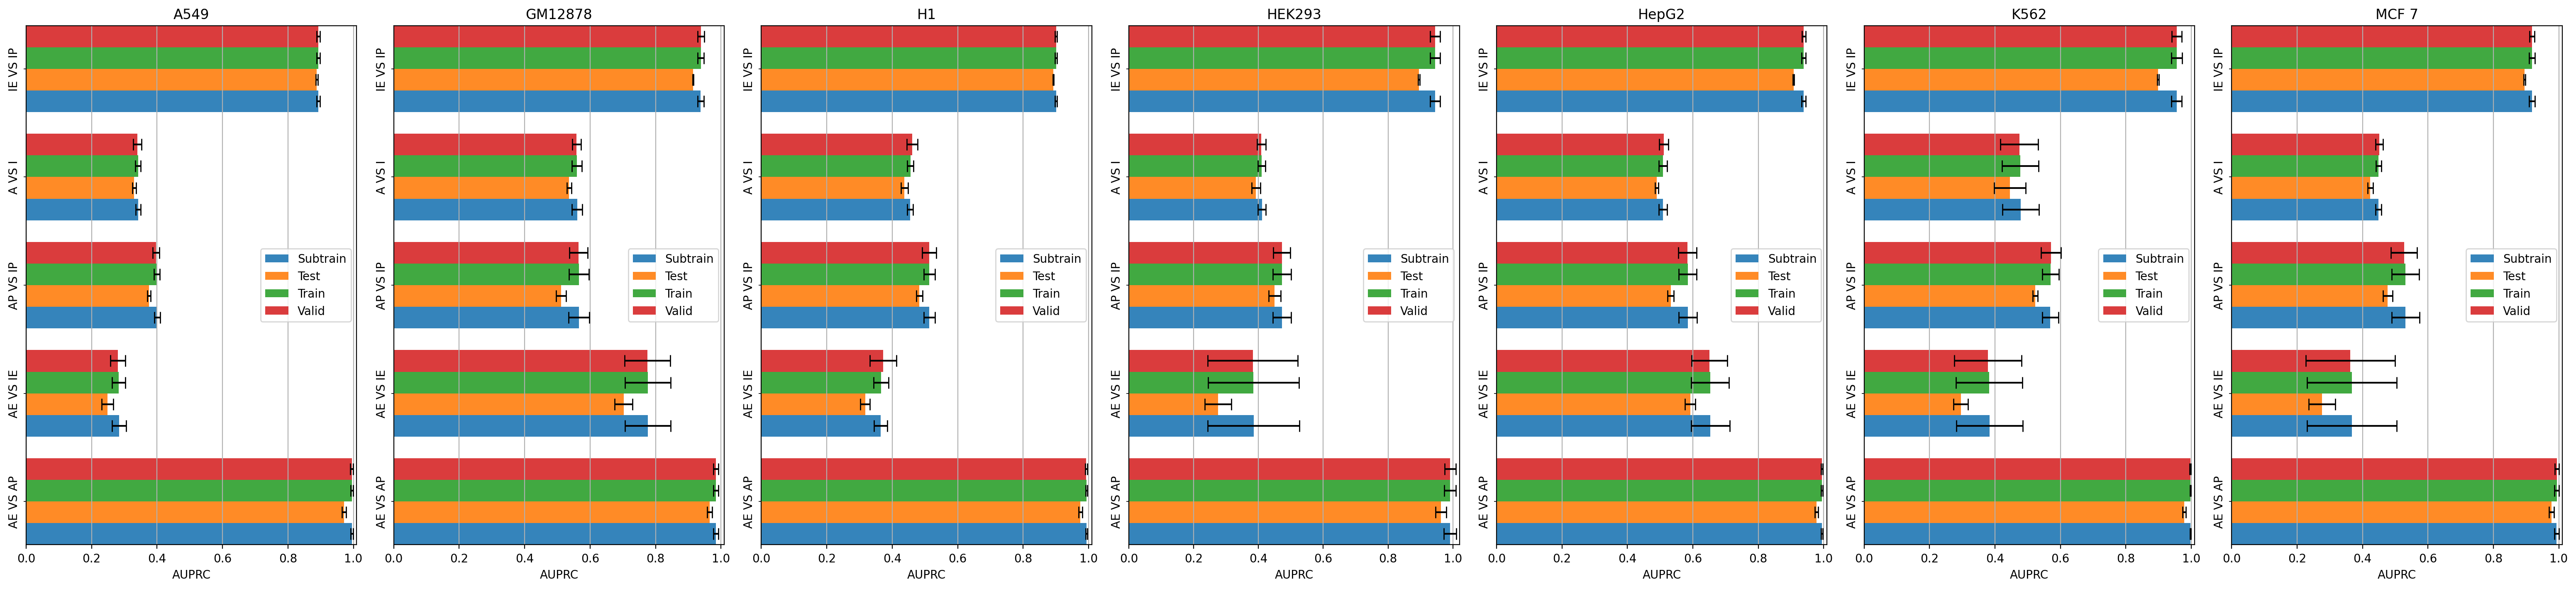

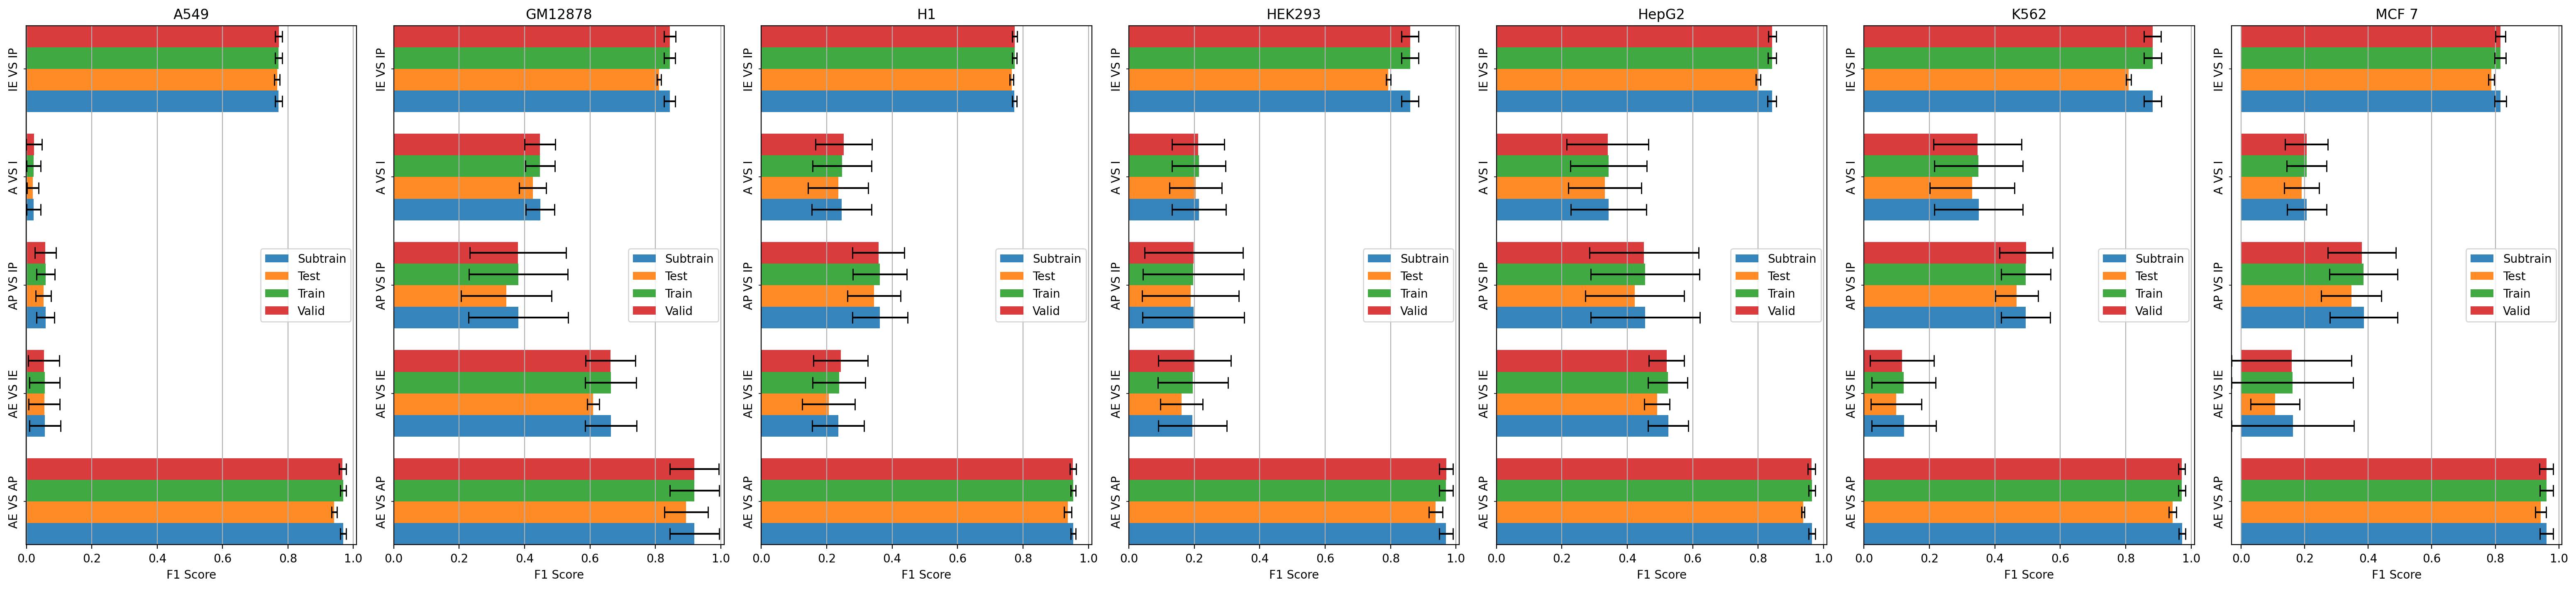

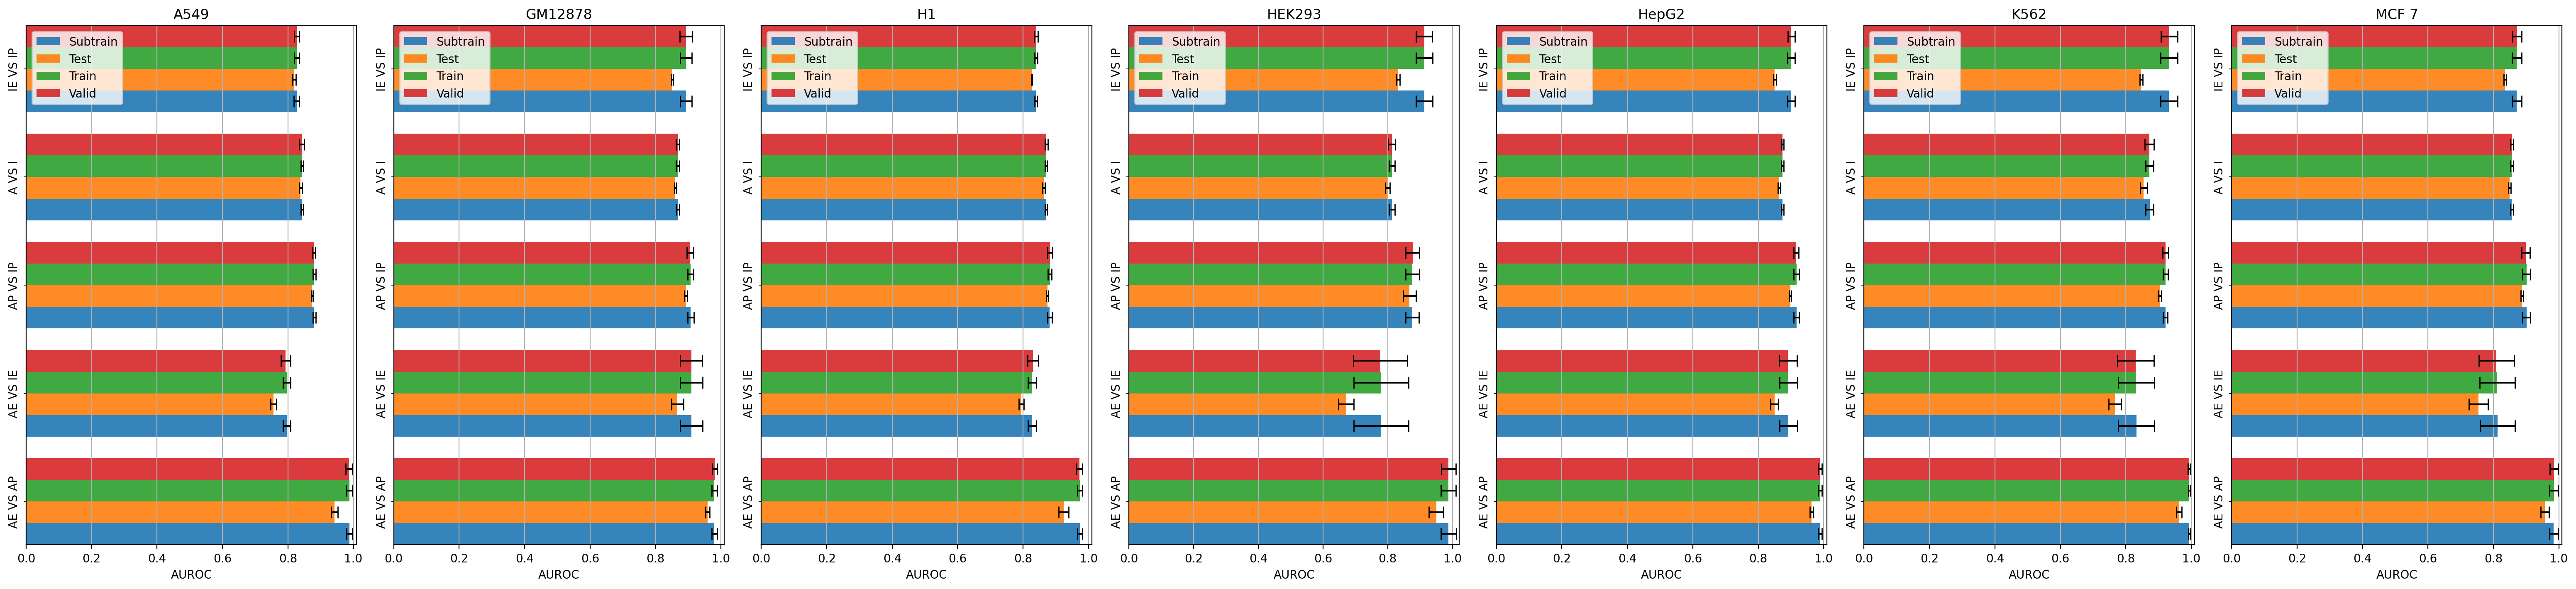

In [5]:
index = ["cell_line", "task", "run_type"]
fig, axes = barplots(
    df.drop(columns=["holdout_number"])[index+["AUROC", "AUPRC", "f1_score"]],
    groupby=index,
    custom_defaults=custom_defaults,
    subplots=True,
    plots_per_row=7,
    orientation="horizontal",
    unique_minor_labels=False,
    minor_rotation=90
)